In [12]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
from itables import show
import itables.options as opt
import missingno as msno
opt.warn_on_int_to_str_conversion = False

In [2]:
df = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv', low_memory=False)

In [3]:
df.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,...,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,7/12/2023 8:03 pm,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Return columns where null values are >= 80%
null_columns = list(df.columns[df.isnull().sum() >= 0.8*len(df)])

In [5]:
# Get the columns that are not completely null
not_null_columns = df.columns[~df.columns.isin(null_columns)]

# Create a new dataframe with only the non-null columns
df_not_null = df[not_null_columns]

In [6]:
show(df_not_null)

In [7]:
#check missing values
show(df_not_null.isnull().sum())

In [8]:
# show observations where impressions are not equal to organic impressions
show(df_not_null[df_not_null['Impressions'] != df_not_null['Organic Impressions']])

### Note

On careful examination, posts with no impressions (i.e Impressions = NaN) correspond to deleted tweets.<br>
This is also reflected like in other columns engagements, reactions, Click-through rate etc.
The observations will be dropped

In [9]:
#drop rows where impressions are NaN or 0
df_not_null = df_not_null[(df_not_null['Impressions'].notna()) & (df_not_null['Impressions'] != "0")]

In [10]:
show(df_not_null.isna().sum())

In [8]:
# show(df_not_null)

In [26]:
show(df_not_null[['Date','Potential Reach']])

In [28]:
show(df_not_null.dtypes)

In [ ]:
# check distribution of potential reach
df_not_null['Potential Reach'] = df_not_null['Potential Reach'].astype(int)
df_not_null['Potential Reach'].describe()

<AxesSubplot:>

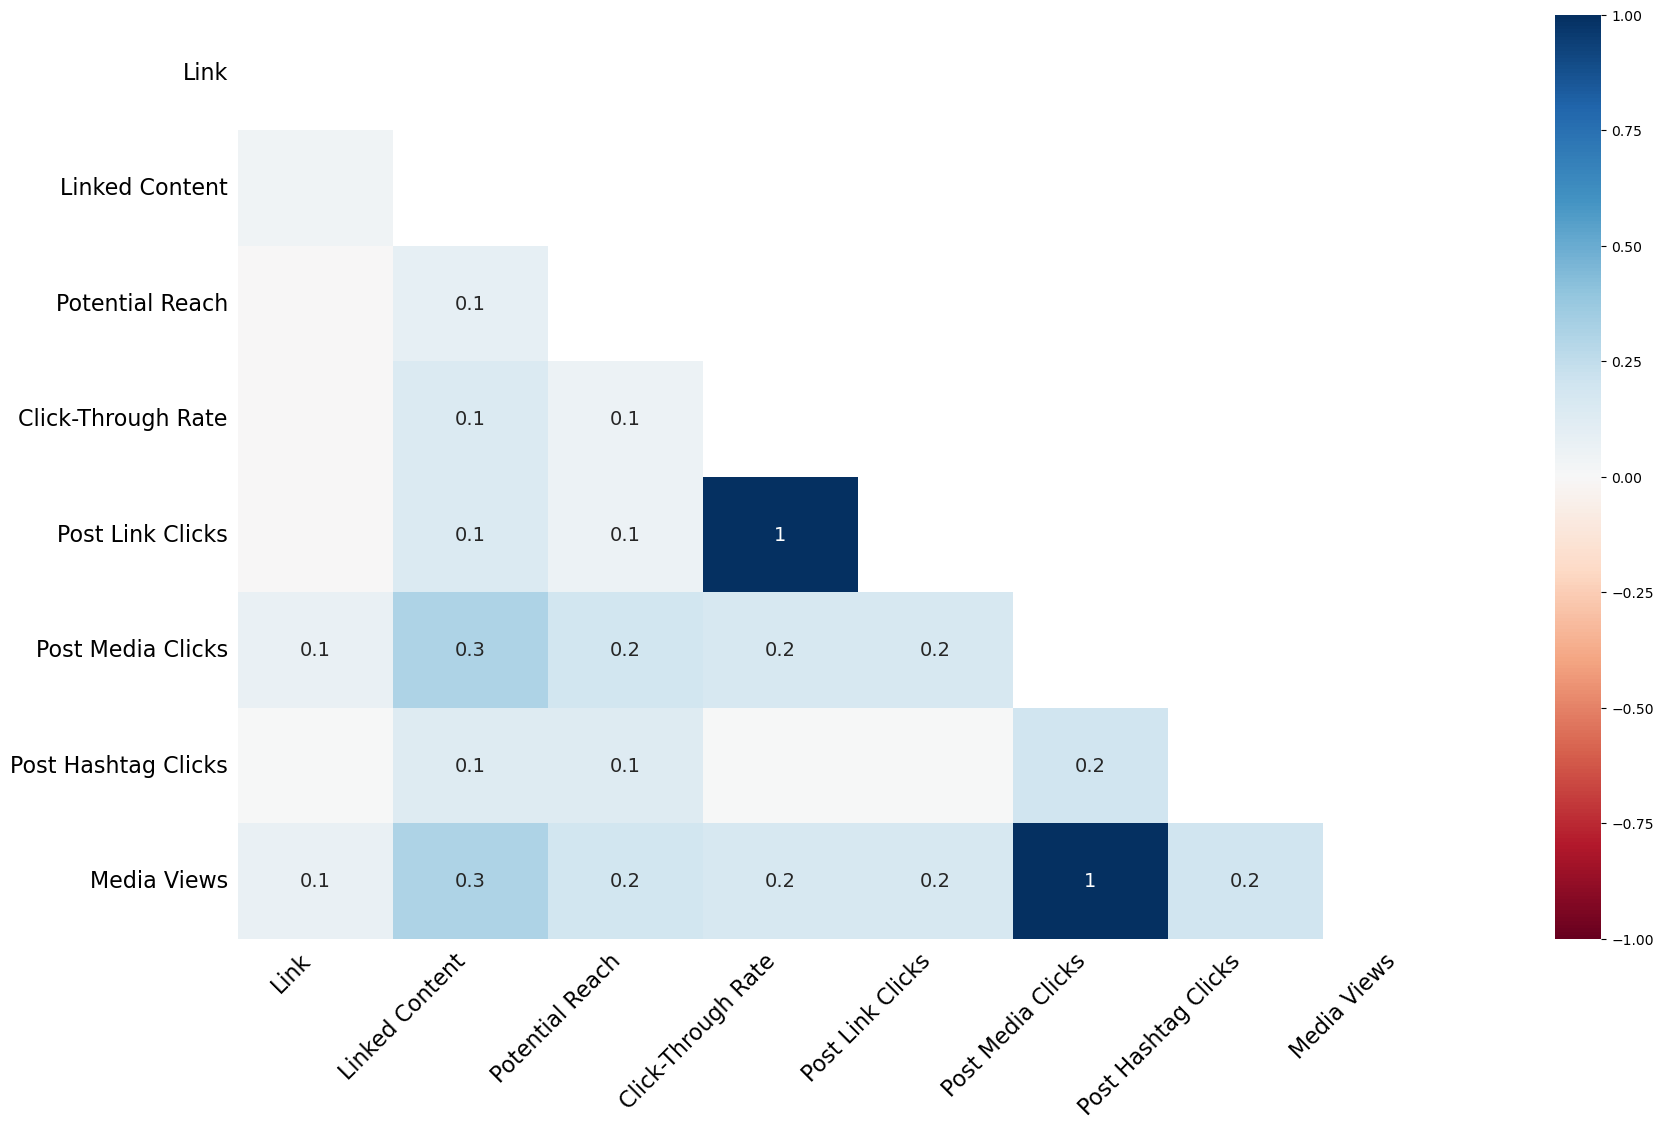

In [19]:
# create a missing data matrix
msno.heatmap(df_not_null)

<AxesSubplot:>

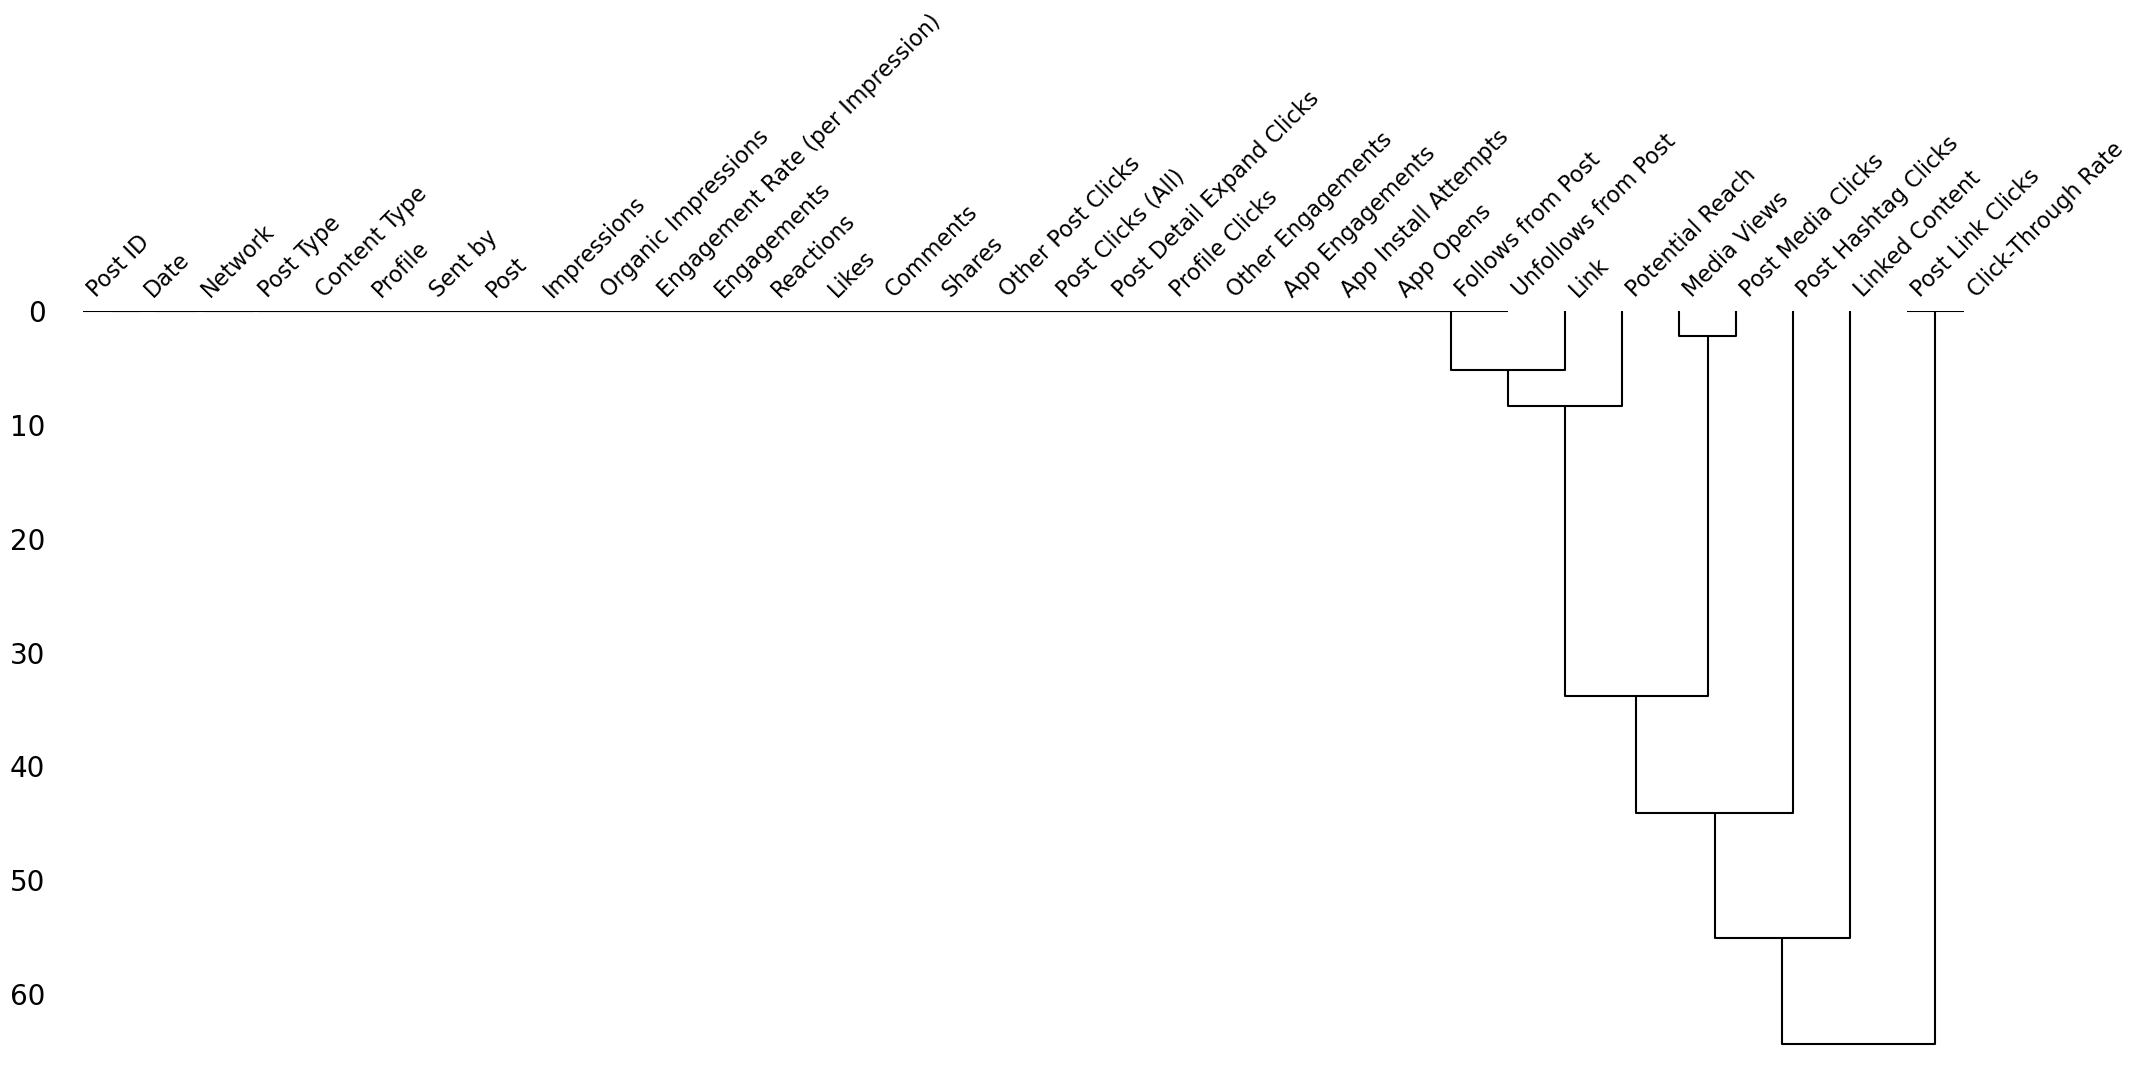

In [21]:
msno.dendrogram(df_not_null)

In [17]:
show(df_not_null[df_not_null.isna()])

### Note

Missing Impression values 

In [ ]:
#### columns to be cleared 

['Post ID', 'Network', 'Post Type', 'Profile',
 'Link', 'Linked Content', 'Organic Impressions', 'Potential Reach',
'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
'Other Engagements', 'App Engagements', 'App Install Attempts',
'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views'],

In [10]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Post ID                           8529 non-null   int64  
 2   Network                           8529 non-null   object 
 3   Post Type                         8529 non-null   object 
 4   Content Type                      8529 non-null   object 
 5   Profile                           8529 non-null   object 
 6   Sent by                           8529 non-null   object 
 7   Link                              8481 non-null   object 
 8   Post                              8529 non-null   object 
 9   Linked Content                    4978 non-null   object 
 10  Impressions                       7842 non-null   object 
 11  Organic Impressions               7842 non-null   object 
 12  Potent

In [11]:
df_not_null.dtypes

Date                                 object
Post ID                               int64
Network                              object
Post Type                            object
Content Type                         object
Profile                              object
Sent by                              object
Link                                 object
Post                                 object
Linked Content                       object
Impressions                          object
Organic Impressions                  object
Potential Reach                      object
Engagement Rate (per Impression)     object
Engagements                          object
Reactions                            object
Likes                                object
Comments                            float64
Shares                               object
Click-Through Rate                   object
Post Link Clicks                    float64
Other Post Clicks                    object
Post Clicks (All)               

In [12]:
# Count the number of words in each post
df_not_null['Post'].str.split().str.len()

0       45
1       17
2       33
3       12
4       21
        ..
8524    20
8525    18
8526    18
8527    19
8528    21
Name: Post, Length: 8529, dtype: int64

In [13]:
#Check posts without links
df_not_null[~df_not_null['Post'].str.contains('http')]

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,...,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,bit.ly Link Clicks,Video Views,Media Views,Tags
1,7/12/2023 8:03 pm,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,...,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
80,6/26/2023 10:00 am,1673254791617675265,Twitter,Tweet,Text,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1673254...,Type 'IT CAN BE' if you will be making more sa...,NaN,...,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
82,6/25/2023 9:49 pm,1673070815200391175,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/1673070...,Running your business without a plan? It shoul...,NaN,...,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
125,6/15/2023 6:19 pm,1669394086506135570,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1669394...,Have you ever partnered with someone in busine...,NaN,...,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,BCC
170,6/4/2023 7:38 pm,1665427701014884352,Twitter,Tweet,Text,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1665427...,Did you know? \n\nOverconsumption and waste ge...,NaN,...,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,2/18/2013 7:57 pm,303578995008610304,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035789...,FCMB CEO at Stanbic IBTC sponsored hub: We've ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8523,2/18/2013 7:55 pm,303578434796400640,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035784...,1st Bank CEO: Should banks only be rated on th...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8524,2/18/2013 7:39 pm,303574464447270914,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035744...,FCMB CEO at the Stanbic IBTC sponsored BIT hub...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8525,2/18/2013 7:13 pm,303567968183390209,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/3035679...,Next event at the Stanbic IBTC sponsored BIT H...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_not_null[(df_not_null['Post Clicks (All)'].isna()) & (~df_not_null['Post'].str.contains('http'))].shape[0]

144

In [15]:
df_not_null.Date[0:20]

0     7/13/2023 10:57 am
1      7/12/2023 8:03 pm
2      7/12/2023 7:00 pm
3      7/12/2023 6:20 pm
4     7/11/2023 12:50 pm
5     7/11/2023 11:00 am
6      7/11/2023 8:00 am
7      7/10/2023 6:05 pm
8      7/10/2023 5:09 pm
9      7/10/2023 2:14 pm
10    7/10/2023 11:00 am
11     7/10/2023 8:00 am
12      7/9/2023 6:00 pm
13      7/9/2023 4:00 pm
14      7/9/2023 3:00 pm
15     7/9/2023 12:00 pm
16      7/9/2023 9:00 am
17      7/8/2023 3:00 pm
18     7/8/2023 12:00 pm
19      7/8/2023 9:30 am
Name: Date, dtype: object

In [17]:
show(df_not_null)

In [20]:
df_not_null['Click-Through Rate'].isna().sum()

4916

In [21]:
df_not_null.shape[0]

8529

In [ ]:
df_not_null.to_csv('./data/Twitter_cleaned.csv', index=False)